# Analyse de la concentration d'arbres à Paris

#### L'objectif de cette analyse est de déterminer la concentration d'arbres dans les différents arrondissements parisiens ainsi que leurs caractéristiques afin d'optimiser les tournées d'entretiens.

Avec une superficie de 105km², la ville de Paris compte pas moins de 200 000 arbres plantés dans les rues, les espaces verts et les équipements municipaux, sans oublier les plus de 300 000 arbres dans les bois de Boulogne et Vincennes, Paris est une des capitales les plus boisées d’Europe. Il en sera planté 170 000 de plus à l'horizon 2026, tant l'arbre est un allié face au changement climatique.

Le cycle de vie d’un arbre est identique en milieu naturel et en milieu urbain, toutefois, les contraintes spécifiques de la ville exigent un accompagnement attentif de chaque arbre et le renouvellement des sujets dépérissant. Tout au long de l’année, la Ville de Paris assure la surveillance du patrimoine arboré, le remplacement des arbres dépérissant et l’installation de nouvelles plantations.

Dans cette étude nous analyserons la répartition de ces arbres suivant leur domanialité, et leur arrondissement.
Enfin, nous étudierons la répartition des différentes espèces d'arbres suivant leurs dimensions.

En premier lieu nous effectuerons un nettoyage du jeu de données sans lequel cette étude ne pourrait pas être réalisée.

1. Installation de vitualenv (optionnel)
2. Importation librairies
3. Analyse dataset
4. Nettoyage dataset
5. Visualisation des données


# 1. Installation Virtualenv

On installe virtualenv pour créer des projets Python isolés. C'est une sorte de salle blanche isolée des autres versions de Python et des bibliothèques.

In [ ]:
%pip install virtualenv

# 2. Importation librairies

On importe les librairies nécessaires au projet et on charge le fichier du projet en spécifiant le séparateur.
On affiche une partie de données ainsi que le nombre d'individus et de paramètres

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('p2-arbres-fr.csv', sep=';')
data

id type_emplacement domanialite     arrondissement  \
0         99874            Arbre      Jardin     PARIS 7E ARRDT   
1         99875            Arbre      Jardin     PARIS 7E ARRDT   
2         99876            Arbre      Jardin     PARIS 7E ARRDT   
3         99877            Arbre      Jardin     PARIS 7E ARRDT   
4         99878            Arbre      Jardin    PARIS 17E ARRDT   
...         ...              ...         ...                ...   
200132  2024741            Arbre      Jardin  BOIS DE VINCENNES   
200133  2024742            Arbre      Jardin  BOIS DE VINCENNES   
200134  2024743            Arbre      Jardin  BOIS DE VINCENNES   
200135  2024744            Arbre      Jardin  BOIS DE VINCENNES   
200136  2024745            Arbre      Jardin  BOIS DE VINCENNES   

       complement_addresse  numero  \
0                      NaN     NaN   
1                      NaN     NaN   
2                      NaN     NaN   
3                      NaN     NaN   
4                      NaN     NaN   
...                    ...     ...   
200132                 NaN     NaN   
200133                 NaN     NaN   
200134                 NaN     NaN   
200135                 NaN     NaN   
200136                 NaN     NaN   

                                                     lieu id_emplacement  \
0               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4              PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   
...                                                   ...            ...   
200132  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170151   
200133  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170152   
200134  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170153   
200135  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170154   
200136  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170155   

           libelle_francais      genre         espece variete  \
0                Marronnier   Aesculus  hippocastanum     NaN   
1                        If      Taxus        baccata     NaN   
2                        If      Taxus        baccata     NaN   
3                    Erable       Acer        negundo     NaN   
4              Arbre à miel  Tetradium      daniellii     NaN   
...                     ...        ...            ...     ...   
200132                  NaN   Castanea       fargesii     NaN   
200133  Arbre aux mouchoirs    Davidia    involucrata     NaN   
200134             Peuplier    Populus        simonii     NaN   
200135                Chêne    Quercus         n. sp.     NaN   
200136            Raisinier    Hovenia         dulcis     NaN   

        circonference_cm  hauteur_m stade_developpement  remarquable  \
0                     20          5                 NaN          0.0   
1                     65          8                   A          NaN   
2                     90         10                   A          NaN   
3                     60          8                   A          NaN   
4                     38          0                 NaN          NaN   
...                  ...        ...                 ...          ...   
200132                 0          0                 NaN          0.0   
200133                 0          0                 NaN          0.0   
200134                 0          0                 NaN          0.0   
200135                 0          0                 NaN          0.0   
200136                 0          0                 NaN          0.0   

        geo_point_2d_a  geo_point_2d_b  
0            48.857620        2.320962  
1            48.857656        2.321031  
2            48.857705        2.321061  
3            48.857722      

# 3. Analyse du dataset

On analyse le type des paramètres

In [3]:
data.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

On affiche les valeurs manquantes par colonne

In [4]:
Nan_value = data.isnull().sum()
print(Nan_value)

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    169235
numero                 200137
lieu                        0
id_emplacement              0
libelle_francais         1497
genre                      16
espece                   1752
variete                163360
circonference_cm            0
hauteur_m                   0
stade_developpement     67205
remarquable             63098
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64


On peut remarquer de nombreuses valeurs manquantes. Malgré tout ces colonnes n'aide pas à l'analyse du dataframe et ne pose donc pas de problèmes.
Nous allons donc supprimer ces colonnes inutiles pour notre étude.
Il est impossible de retrouver les valeurs manquantes pour les paramètres domanialité et libellé_français, on supprime alors simplement les valeurs manquantes afin de poursuivre notre analyse.
Egalement, dans la colonne libellé_français des individus ont pour valeur "non spécifié", il est impossible de remplacer ces valeurs par des données exactes, on supprime ces individus.

In [5]:
data.drop(['type_emplacement', 'complement_addresse', 'numero', 'lieu',\
          'id_emplacement', 'genre', 'espece', 'variete', 'stade_developpement',\
          'remarquable', 'geo_point_2d_a', 'geo_point_2d_b'], axis=1, inplace=True)

In [6]:
index_null_value = data[data['domanialite'].isna()].index
data.drop(index_null_value , inplace=True)
index_null_value = data[data['libelle_francais'].isna()].index
data.drop(index_null_value , inplace=True)
index_null_value = data[data['libelle_francais']== 'Non spécifié'].index
data.drop(index_null_value, inplace=True)

La suppression de ces individus est marginal par rapport à la globalité du dataset.

On vérifie notre opération.

In [7]:
Nan_value = data.isnull().sum()
print(Nan_value)

id                  0
domanialite         0
arrondissement      0
libelle_francais    0
circonference_cm    0
hauteur_m           0
dtype: int64


On peut désormais analyser la globalité du dataset en étudiant la moyenne, l'écart-type et les dimensions minimale et maximale des individus.

In [8]:
data.describe()

id  circonference_cm      hauteur_m
count  1.980830e+05     198083.000000  198083.000000
mean   3.835478e+05         83.737751      13.186361
std    5.406631e+05        676.624690    1981.411016
min    9.987400e+04          0.000000       0.000000
25%    1.559655e+05         30.000000       5.000000
50%    2.208730e+05         70.000000       8.000000
75%    2.737155e+05        115.000000      12.000000
max    2.024745e+06     250255.000000  881818.000000

On peut facilement se rendre compte des outliers qui composent le dataset dans les paramètres circonference et hauteur.

Pour traiter le dataset correctement, on modifie l'unité de valeur de la colonne circonference. On en profite également pour modifier l'unité du nom de la colonne.

In [9]:
data['circonference_cm'] = data['circonference_cm'] / 100
data.rename(columns={ 'circonference_cm': 'circonference_m' }, inplace=True)

# 4. Nettoyage du dataset

On tente une analyse rapide des outliers pour le paramètre circonférence de 10 mètres qui est une valeur élevé pour un arbre

In [10]:
data[data['circonference_m'] > 10]

id domanialite     arrondissement libelle_francais  \
5264     106662      Jardin     PARIS 7E ARRDT      Micocoulier   
5717     107152      Jardin    PARIS 14E ARRDT         Robinier   
5979     107423      Jardin     PARIS 7E ARRDT          Tilleul   
5993     107438      Jardin     PARIS 7E ARRDT          Platane   
6340     107808      Jardin     PARIS 7E ARRDT          Tilleul   
...         ...         ...                ...              ...   
189561  2012016      Jardin    PARIS 17E ARRDT            Hêtre   
191872  2014645      Jardin  BOIS DE VINCENNES            Hêtre   
192901  2015685      Jardin  BOIS DE VINCENNES              Pin   
198023  2021947  Alignement    PARIS 15E ARRDT           Erable   
198671  2022743   CIMETIERE       VAL-DE-MARNE          Tilleul   

        circonference_m  hauteur_m  
5264              24.39         19  
5717              11.33         10  
5979              11.38         15  
5993              23.00          6  
6340              11.20         13  
...                 ...        ...  
189561            13.37          8  
191872            11.90         22  
192901            12.00         22  
198023            27.50         10  
198671            21.30         10  

[71 rows x 6 columns]

On retrouve de nombreuses valeurs pour une circonférence supérieur à 10 mètres, avec des incohérences pour leur hauteur. Certaine circonférence sont plus importante que leurs hauteurs respectives. Ces outliers concernent des espèces d'arbres différentes ce qui sera difficile à nettoyer. On fait la même observation pour la hauteur des arbres, en prenant les valeurs supérieures à 100 mètres qui est une mesure beaucoup trop important pour Paris. On rappelle que les batiments parisiens mesures entre 12 et 20 mètres, les arbres ne dépassent que très rarement voir jamais ces batiments. Si les valeurs dépassent les 100 mètres, elles seront alors incohérente.

In [11]:
data[data['hauteur_m'] >= 100]

id domanialite     arrondissement libelle_francais  \
5392     106800      Jardin     PARIS 7E ARRDT          Tilleul   
6473     107951      Jardin     PARIS 7E ARRDT          Platane   
12536    115062      Jardin    PARIS 16E ARRDT           Erable   
15373    118412      Jardin     PARIS 7E ARRDT        Paulownia   
24099    128185      Jardin    PARIS 17E ARRDT          Platane   
...         ...         ...                ...              ...   
189053  2011417      Jardin  BOIS DE VINCENNES              Pin   
189441  2011863        DFPE    PARIS 16E ARRDT       Marronnier   
189518  2011961  Alignement   BOIS DE BOULOGNE          Platane   
197136  2020792      Jardin    PARIS 14E ARRDT           Erable   
197146  2020802      Jardin    PARIS 14E ARRDT           Erable   

        circonference_m  hauteur_m  
5392               1.00       1510  
6473               1.12        117  
12536              0.47        255  
15373              1.45        810  
24099              1.30        125  
...                 ...        ...  
189053             0.60        150  
189441             0.08        157  
189518             0.67        105  
197136             1.45        125  
197146             1.50        105  

[163 rows x 6 columns]

Après cette rapide analyse des dimensions des arbres nous pouvons constater de nombreuses valeurs incohérentes avec les caractéristique des individus. Il sera difficile d'éliminer ces valeurs, on effectue alors une analyse plus approfondie sur chaque espèce d'arbre.

In [12]:
print(data['libelle_francais'].unique())

['Marronnier' 'If' 'Erable' 'Arbre à miel' 'Platane' 'Sophora'
 'Prunus n. sp.' 'Hêtre' 'Micocoulier' 'Tilleul' 'Chêne' 'Savonnier'
 'Copalme' 'Noyer' 'Arbre à caramel' 'Troene' 'Tulipier' 'Pin' 'Sapin'
 'Cerisier à fleurs' 'Charme-Houblon' 'Cèdre' 'Paulownia' 'Thuya'
 'Pommier à fleurs' 'Poirier' 'Pommier' 'Bouleau' 'Orme' 'Arbre de Judée'
 'Robinier' 'Frêne' 'Aubépine' 'Fevier' 'Prunier à fleurs'
 'Arbre aux quarante écus' 'Néflier commun' 'Saule' 'Magnolia'
 'Prunier à fruits' 'Poirier à fleurs' 'Peuplier' 'Faux-cyprès' 'Aubepine'
 'Plaqueminier' 'Mûrier' 'Pêcher' 'Pterocarya' 'Merisier'
 'Noisetier de Byzance' 'Alisier' 'Cognassier'
 'Parrotie de Perse - Arbre de fer' 'Poirier à fruits' 'Orme de Sibérie'
 'Frêne à fleurs' 'Aulne' 'Troëne' 'Fontanesia' 'Cornouiller' 'Cedrele'
 'Catalpa' 'Houx' 'Buis' 'Metaséquoia' 'Chicot du Canada'
 'Oranger des Osages' 'Céphalotaxe' 'Sumac' 'Châtaignier' 'Ailante'
 'Sequoia' 'Lilas des indes' 'Pterostyrax' 'Eucalyptus' 'Olivier'
 'Figuier' 'Charme

In [13]:
data['libelle_francais'].unique().shape

(191,)

On prend un individus test pour analyser l'étendu de la problèmatique. Un tilleul est un arbre originaire du Moyen Orient, il peut atteindre 15 à 18 mètres de haut une fois adulte. On analyse alors si il y a des tilleuls du dataset qui ont une hauteur supérieur à 100 mètres.

In [14]:
data.loc[(data['libelle_francais'] == 'Tilleul') & (data['hauteur_m'] >= 100), :]

id domanialite     arrondissement libelle_francais  \
5392     106800      Jardin     PARIS 7E ARRDT          Tilleul   
113295   234857  Alignement    PARIS 19E ARRDT          Tilleul   
120292   243307  Alignement    PARIS 19E ARRDT          Tilleul   
120370   243386  Alignement    PARIS 19E ARRDT          Tilleul   
151364   275451  Alignement     PARIS 7E ARRDT          Tilleul   
151382   275469  Alignement     PARIS 7E ARRDT          Tilleul   
151443   275530  Alignement     PARIS 7E ARRDT          Tilleul   
151647   275737  Alignement     PARIS 7E ARRDT          Tilleul   
151918   276009  Alignement     PARIS 7E ARRDT          Tilleul   
152205   276297  Alignement     PARIS 7E ARRDT          Tilleul   
152238   276330  Alignement     PARIS 7E ARRDT          Tilleul   
152339   276432  Alignement     PARIS 7E ARRDT          Tilleul   
152437   276530  Alignement     PARIS 7E ARRDT          Tilleul   
182852  2003429  Alignement  BOIS DE VINCENNES          Tilleul   
184098  2004748  Alignement  BOIS DE VINCENNES          Tilleul   
184227  2004879  Alignement  BOIS DE VINCENNES          Tilleul   
187753  2008760         DJS    PARIS 13E ARRDT          Tilleul   
187762  2008769         DJS    PARIS 13E ARRDT          Tilleul   
187763  2008770         DJS    PARIS 13E ARRDT          Tilleul   
187764  2008771         DJS    PARIS 13E ARRDT          Tilleul   
187766  2008773         DJS    PARIS 13E ARRDT          Tilleul   
187771  2008778         DJS    PARIS 13E ARRDT          Tilleul   
187773  2008780         DJS    PARIS 13E ARRDT          Tilleul   
187782  2008789         DJS    PARIS 13E ARRDT          Tilleul   
187784  2008791         DJS    PARIS 13E ARRDT          Tilleul   
187785  2008792         DJS    PARIS 13E ARRDT          Tilleul   
187786  2008793         DJS    PARIS 13E ARRDT          Tilleul   
187787  2008794         DJS    PARIS 13E ARRDT          Tilleul   
187794  2008801         DJS    PARIS 13E ARRDT          Tilleul   

        circonference_m  hauteur_m  
5392               1.00       1510  
113295             0.75        106  
120292             0.70        610  
120370             0.80        107  
151364            75.40        815  
151382             0.85       1515  
151443             1.30        110  
151647             0.65        118  
151918             1.80        218  
152205             1.30       1815  
152238             0.90       1515  
152339             0.80       1510  
152437             1.10       1515  
182852             1.25     881818  
184098             1.40        114  
184227             1.40        154  
187753             0.10        100  
187762             0.10        110  
187763             0.10        105  
187764             0.10        110  
187766             0.10        100  
187771             0.10        110  
187773             0.10        100  
187782             0.10        100  
187784             0.10        115  
187785             0.10        120  
187786             0.10        100  
187787             0.10        100  
187794             0.10        105

On retrouve dans le dataset de nombreux tilleuls ayant une hauteur supérieur à 100 mètres. On peut constater également que la circonférence de ces tilleuls n'est pas en adéquation avec ce que l'on pourrait attendre d'un arbre de cette taille.
On effectue alors une analyse de la moyenne pour se rendre compte de l'impact que peut avoir les valeurs aberrantes du dataset sur une catégorie d'arbre.

In [17]:
data[data['libelle_francais'] == 'Tilleul']['hauteur_m'].mean()

50.58502698896972

On étudie l'interquartile pour se donner une idée des valeurs réels d'un tilleul

In [18]:
data[data['libelle_francais'] == 'Tilleul']['hauteur_m'].quantile([0.25, 0.50, 0.75])

0.25     5.0
0.50    10.0
0.75    12.0
Name: hauteur_m, dtype: float64

Avec une médiane de 10 mètres et une interquartile de 5 mètres et 12 mètres nous avons des valeurs plus cohérentes avec cette catégorie d'arbre.

On effectue alors une visualition des espèces d'arbres par rapport à leur hauteur pour avoir une vision globale de la problématique d'incohérence de valeurs.

In [68]:
plt.figure(figsize=(80, 400))

names = data['libelle_francais'].unique()

data_tree_height = []
for name in names:
    data_tree_height.append(data[data['libelle_francais'] == name]['hauteur_m'])

plt.boxplot(data_tree_height, labels=names, vert=False, showfliers=False)#on supprime les outliers

plt.yticks(fontsize=50)
plt.xticks(fontsize=50)
plt.title('Répartition des Hauteurs (m) par espèce', fontsize=50)
plt.grid(True)
plt.show()

En activant ou désactivant l'affichage des outliers on peut constater des valeurs incohérentes avec les caractéristiques habituelles de ces arbres. 

Pour ne pas biaiser notre étude on élimine les valeurs qui se trouvent au dessus de 95% des autres valeurs.

In [69]:
tree_name = data['libelle_francais'].unique()
for i in tree_name:
    last_quantile = data[data['libelle_francais'] == i]['hauteur_m'].quantile([0.25, 0.50, 0.95])
    index_drop_value = data.loc[(data['libelle_francais'] == i) & (data['hauteur_m'] > last_quantile.loc[0.95])].index
    data.drop(index_drop_value , inplace=True)
    

Nous retrouvons alors pour l'exemple du tilleul une moyenne plus correcte par rapport à ses caractéristiques.

In [70]:
data[data['libelle_francais'] == 'Tilleul']['hauteur_m'].mean()

7.969217151848937

Nous effectuons la même opération pour le paramètre circonférence.

In [71]:
tree_name = data['libelle_francais'].unique()
for i in tree_name:
    last_quantile = data[data['libelle_francais'] == i]['circonference_m'].quantile([0.25, 0.50, 0.95])
    index_drop_value = data.loc[(data['libelle_francais'] == i) & (data['circonference_m'] > last_quantile.loc[0.95])].index
    data.drop(index_drop_value , inplace=True)

Nous retrouvons alors des valeurs qui correspondent mieux à la réalité.

In [72]:
data.describe()

id  circonference_m      hauteur_m
count  1.810700e+05    181070.000000  181070.000000
mean   3.839009e+05         0.700121       7.602590
std    5.388079e+05         0.514077       5.506763
min    9.987400e+04         0.000000       0.000000
25%    1.581492e+05         0.300000       4.000000
50%    2.222025e+05         0.650000       8.000000
75%    2.738158e+05         1.050000      11.000000
max    2.024745e+06         3.350000      27.000000

# 5. Visualisation des données

On peut désormais effectuer les représentation graphiques à commencer par un diagramme camembert.

### Répartition des arbres en camembert

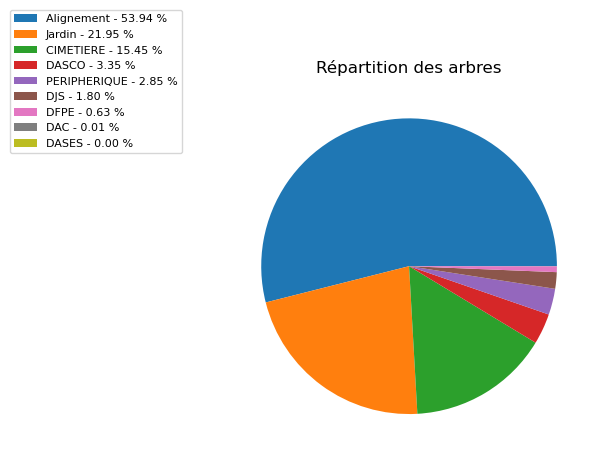

In [73]:
x = data['domanialite'].value_counts().index.tolist()
y = data['domanialite'].value_counts()
percent = 100.*y/y.sum()

patches, texts = plt.pie(y)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

plt.title('Répartition des arbres')
plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
#plt.savefig('arbres_repartition.png', bbox_inches='tight')

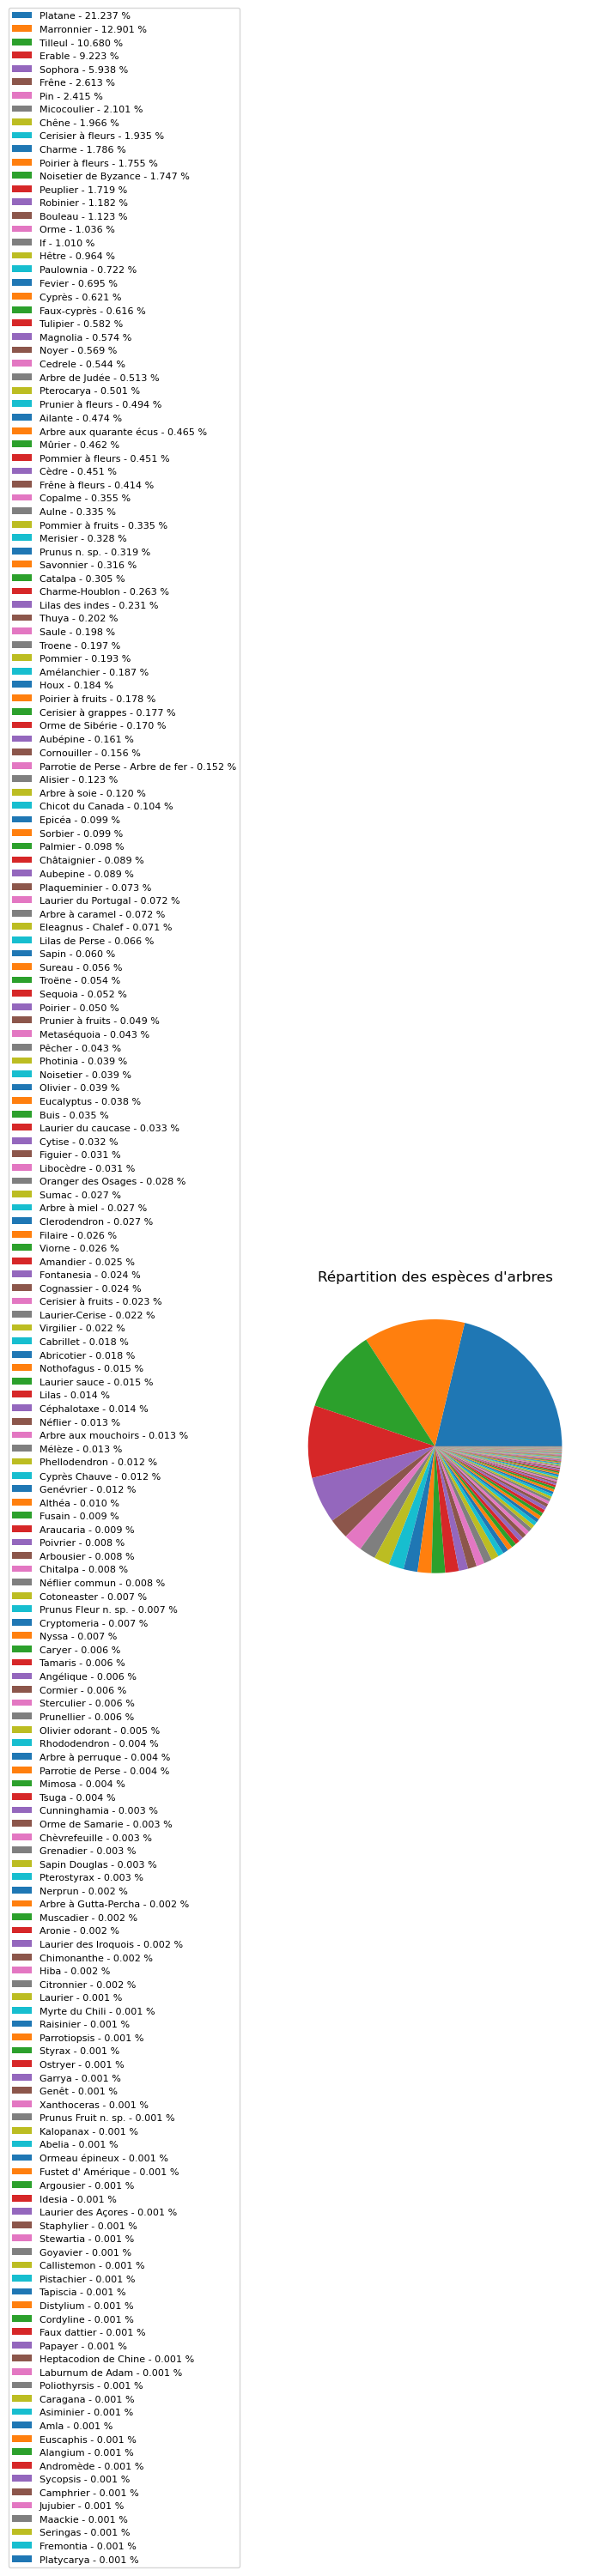

In [74]:
x = data['libelle_francais'].value_counts().index.tolist()
y = data['libelle_francais'].value_counts()
percent = 100.*y/y.sum()

patches, texts = plt.pie(y)
labels = ['{0} - {1:1.3f} %'.format(i,j) for i,j in zip(x, percent)]

plt.title('Répartition des espèces d\'arbres')
plt.legend(patches, labels, loc='right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
#plt.savefig('espèce_repartition.png', bbox_inches='tight')

### Interquartile de la hauteur des arbres

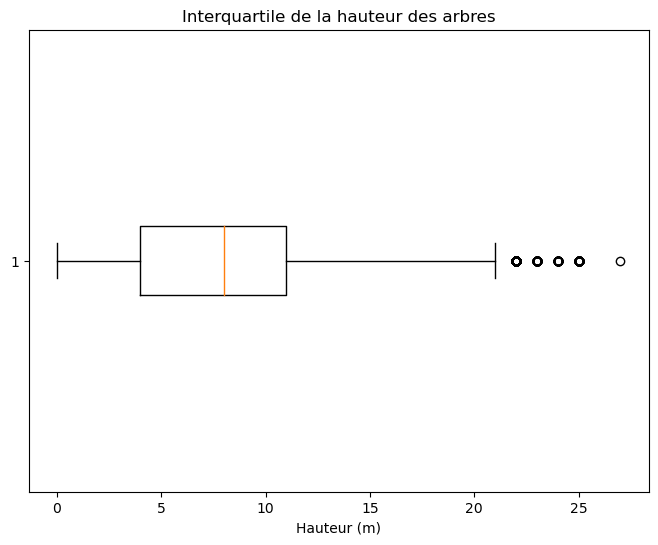

In [82]:
df = pd.DataFrame(data['hauteur_m'])

plt.figure(figsize=(8, 6))
plt.boxplot(df.values, vert=False)
plt.xlabel('Hauteur (m)')
plt.title('Interquartile de la hauteur des arbres')

#plt.savefig('interquartile_hauteur.png', bbox_inches='tight')
plt.show()

### Interquartile de la circonférence des arbres

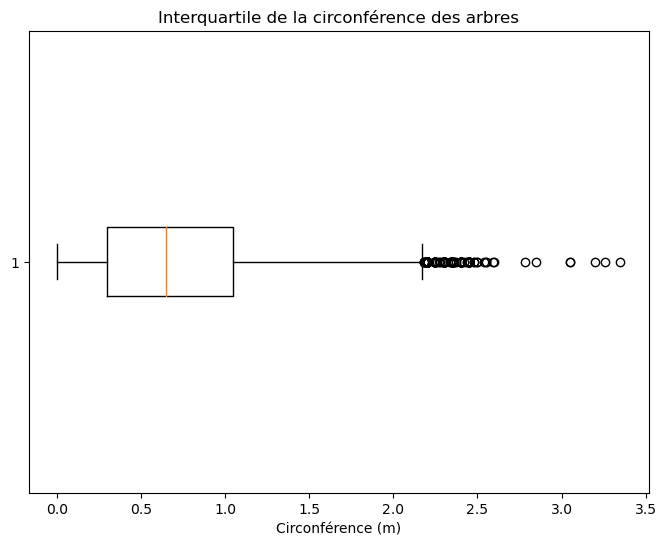

In [83]:
df = pd.DataFrame(data['circonference_m'])

plt.figure(figsize=(8, 6))
plt.boxplot(df.values, vert=False)
plt.xlabel('Circonférence (m)')
plt.title('Interquartile de la circonférence des arbres')

#plt.savefig('interquartile_circonférence.png', bbox_inches='tight')
plt.show()

### Nuage de poids de la hauteur par rapport à la circonférence

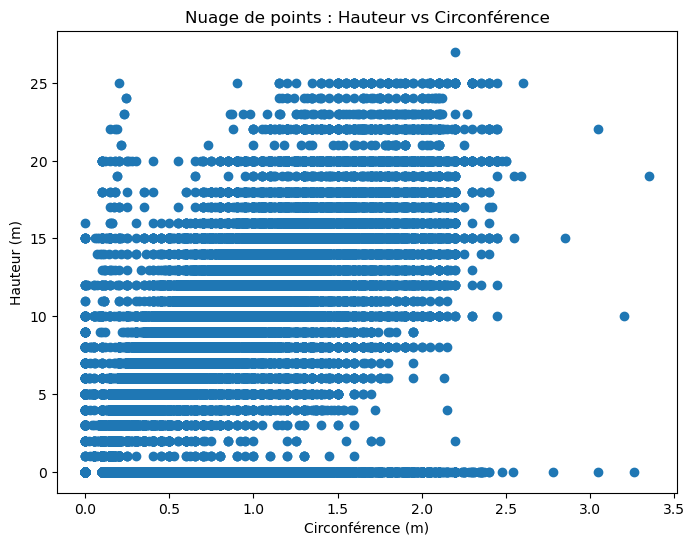

In [94]:
plt.figure(figsize=(8, 6))
plt.scatter(data['circonference_m'], data['hauteur_m'])
plt.xlabel('Circonférence (m)')
plt.ylabel('Hauteur (m)')
plt.title('Nuage de points : Hauteur vs Circonférence')

#plt.savefig('nuage_de_point_hauteur_circonference.png', bbox_inches='tight')
plt.show()

Nous souhaitons désormais afficher le nombre d'arbres dans chaque arrondissement.

In [95]:
data['arrondissement'].unique()

array(['PARIS 7E ARRDT', 'PARIS 17E ARRDT', 'PARIS 16E ARRDT',
       'PARIS 4E ARRDT', 'PARIS 13E ARRDT', 'PARIS 12E ARRDT',
       'PARIS 19E ARRDT', 'PARIS 14E ARRDT', 'PARIS 15E ARRDT',
       'PARIS 3E ARRDT', 'PARIS 20E ARRDT', 'PARIS 18E ARRDT',
       'PARIS 6E ARRDT', 'PARIS 11E ARRDT', 'PARIS 1ER ARRDT',
       'PARIS 2E ARRDT', 'PARIS 5E ARRDT', 'VAL-DE-MARNE',
       'SEINE-SAINT-DENIS', 'HAUTS-DE-SEINE', 'PARIS 9E ARRDT',
       'PARIS 10E ARRDT', 'PARIS 8E ARRDT', 'BOIS DE VINCENNES',
       'BOIS DE BOULOGNE'], dtype=object)

In [96]:
data.shape

(181070, 6)

Nous ne conservons que les arrondissements parisiens pour cette analyse, on élimine alors toutes les valeurs se trouvant à l'extérieur du périphérique

In [97]:
data.drop(data[data['arrondissement'] == 'HAUTS-DE-SEINE'].index, inplace=True)
data.drop(data[data['arrondissement'] == 'VAL-DE-MARNE'].index, inplace=True)
data.drop(data[data['arrondissement'] == 'SEINE-SAINT-DENIS'].index, inplace=True)
data.drop(data[data['arrondissement'] == 'BOIS DE VINCENNES'].index, inplace=True)
data.drop(data[data['arrondissement'] == 'BOIS DE BOULOGNE'].index, inplace=True)
data.shape

(145441, 6)

In [98]:
data['arrondissement'].value_counts()

PARIS 15E ARRDT    16110
PARIS 13E ARRDT    15271
PARIS 16E ARRDT    14877
PARIS 20E ARRDT    13507
PARIS 19E ARRDT    11824
PARIS 12E ARRDT    11620
PARIS 17E ARRDT    10277
PARIS 14E ARRDT    10094
PARIS 18E ARRDT     9065
PARIS 7E ARRDT      7639
PARIS 8E ARRDT      6605
PARIS 11E ARRDT     5314
PARIS 10E ARRDT     2997
PARIS 4E ARRDT      2500
PARIS 5E ARRDT      2038
PARIS 6E ARRDT      1641
PARIS 1ER ARRDT     1315
PARIS 3E ARRDT      1128
PARIS 9E ARRDT      1106
PARIS 2E ARRDT       513
Name: arrondissement, dtype: int64

In [100]:
count_tree = data['arrondissement'].value_counts()

value_count = count_tree.values

df_count_tree = value_count
df_count_tree.sort()
df_count_tree

array([  513,  1106,  1128,  1315,  1641,  2038,  2500,  2997,  5314,
        6605,  7639,  9065, 10094, 10277, 11620, 11824, 13507, 14877,
       15271, 16110])

### Colormap du nombre d'arbres par arrondissement

Nombre d'arbres : 513, Couleur Hex : #f7fcf5
Nombre d'arbres : 1106, Couleur Hex : #f0f9ec
Nombre d'arbres : 1128, Couleur Hex : #e8f6e4
Nombre d'arbres : 1315, Couleur Hex : #ddf2d8
Nombre d'arbres : 1641, Couleur Hex : #d1edcb
Nombre d'arbres : 2038, Couleur Hex : #c3e7bc
Nombre d'arbres : 2500, Couleur Hex : #b4e1ad
Nombre d'arbres : 2997, Couleur Hex : #a3da9d
Nombre d'arbres : 5314, Couleur Hex : #91d28e
Nombre d'arbres : 6605, Couleur Hex : #7dc87e
Nombre d'arbres : 7639, Couleur Hex : #6abf71
Nombre d'arbres : 9065, Couleur Hex : #53b466
Nombre d'arbres : 10094, Couleur Hex : #3fa95c
Nombre d'arbres : 10277, Couleur Hex : #329b51
Nombre d'arbres : 11620, Couleur Hex : #268e47
Nombre d'arbres : 11824, Couleur Hex : #17813d
Nombre d'arbres : 13507, Couleur Hex : #097532
Nombre d'arbres : 14877, Couleur Hex : #006529
Nombre d'arbres : 15271, Couleur Hex : #005522
Nombre d'arbres : 16110, Couleur Hex : #00441b


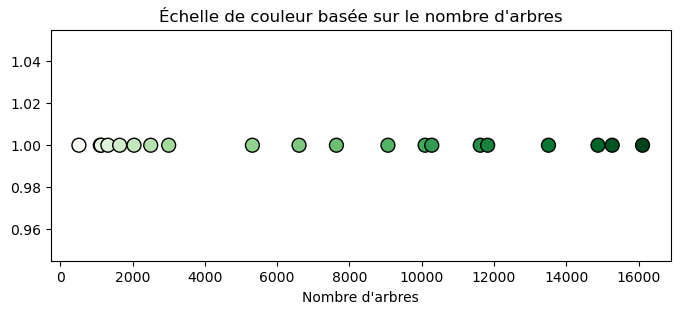

In [115]:
import matplotlib
import matplotlib.colors as mcolors
valeurs = df_count_tree

cmap = matplotlib.colormaps['Greens']
colors = cmap(np.linspace(0, 1, len(valeurs)))

hex_values = [mcolors.to_hex(color) for color in colors]

for valeur, color_Hex in zip(valeurs, hex_values):
    print(f"Nombre d'arbres : {valeur}, Couleur Hex : {color_Hex}")

plt.figure(figsize=(8, 3))
plt.scatter(valeurs, [1] * len(valeurs), c=colors, s=100, edgecolors='k')
plt.xlabel('Nombre d\'arbres')
plt.title('Échelle de couleur basée sur le nombre d\'arbres')

#plt.savefig('colormap_nombre_arbre.png', bbox_inches='tight')
plt.show()

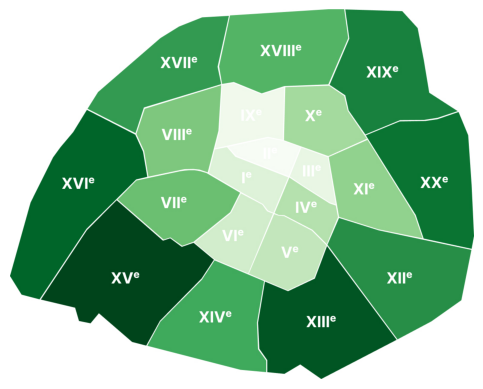

In [114]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path_image = 'Paris_trees.jpg'
image = mpimg.imread(path_image)
plt.imshow(image)
plt.axis('off')

plt.show()